<a href="https://colab.research.google.com/github/danaabdi/sephora/blob/main/Sephora_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEPHORA CAPSTONE PROJECT**

In [ ]:
# Product Data Content
# --------------------

# product_id: The unique identifier for the product from the site
# product_name: The full name of the product
# brand_id: The unique identifier for the product brand from the site
# brand_name: The full name of the product brand
# loves_count: The number of people who have marked this product as a favorite
# rating: The average rating of the product based on user reviews
# reviews: The number of user reviews for the product
# size: The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type
# variation_type: The type of variation parameter for the product (e.g. Size, Color)
# variation_value: The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)
# variation_desc: A description of the variation parameter for the product (e.g. tone for fairest skin)
# ingredients: A list of ingredients included in the product,
#              for example: ['Product variation 1:', 'Water, Glycerin', 'Product variation 2:', 'Talc, Mica']
#              or if no variations: ['Water, Glycerin']
# price_usd: The price of the product in US dollars
# value_price_usd: The potential cost savings of the product, presented on the site next to the regular price
# sale_price_usd: The sale price of the product in US dollars
# limited_edition: Indicates whether the product is a limited edition or not (1-true, 0-false)
# new: Indicates whether the product is new or not (1-true, 0-false)
# online_only: Indicates whether the product is only sold online or not (1-true, 0-false)
# out_of_stock: Indicates whether the product is currently out of stock or not (1 if true, 0 if false)
# sephora_exclusive: Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)
# highlights: A list of tags or features that highlight the product's attributes (e.g. ['Vegan', 'Matte Finish'])
# primary_category: First category in the breadcrumb section
# secondary_category: Second category in the breadcrumb section
# tertiary_category: Third category in the breadcrumb section
# child_count: The number of variations of the product available
# child_max_price: The highest price among the variations of the product
# child_min_price: The lowest price among the variations of the product


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

df_reviews_1 = pd.read_csv('/content/reviews_0_250.csv')
df_reviews_2 = pd.read_csv('/content/reviews_250_500.csv')
df_reviews_3 = pd.read_csv('/content/reviews_500_750.csv')
df_reviews_4 = pd.read_csv('/content/reviews_750_1000.csv')
df_reviews_5 = pd.read_csv('/content/reviews_1000_1500.csv')
df_reviews_6 = pd.read_csv('/content/reviews_1500_end.csv')
df_reviews_1.shape
df_reviews_2.shape
df_reviews_3.shape
df_reviews_4.shape
df_reviews_5.shape
df_reviews_6.shape

<ipython-input-2-22b00beb0709>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_1 = pd.read_csv('/content/reviews_0_250.csv')
<ipython-input-2-22b00beb0709>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_5 = pd.read_csv('/content/reviews_1000_1500.csv')
<ipython-input-2-22b00beb0709>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_6 = pd.read_csv('/content/reviews_1500_end.csv')


In [3]:
print("\n❓ Missing values count:\n", df_reviews_1.isnull().sum())
print("\n❓ Missing values count:\n", df_reviews_2.isnull().sum())
print("\n❓ Missing values count:\n", df_reviews_3.isnull().sum())
print("\n❓ Missing values count:\n", df_reviews_4.isnull().sum())
print("\n❓ Missing values count:\n", df_reviews_5.isnull().sum())
print("\n❓ Missing values count:\n", df_reviews_6.isnull().sum())


❓ Missing values count:
 Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              117486
helpfulness                 331832
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                    999
review_title                167011
skin_tone                   106056
eye_color                   138488
skin_type                    74683
hair_color                  141081
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

❓ Missing values count:
 Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended               25986
helpfulness                 107874
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count 

In [9]:
df_reviews_1.shape


(602130, 19)

In [10]:
df_reviews_2.shape


(206725, 19)

In [11]:
df_reviews_3.shape


(206725, 19)

In [12]:
df_reviews_4.shape


(116262, 19)

In [13]:
df_reviews_5.shape


(119317, 19)

In [14]:
df_reviews_6.shape

(49977, 19)

In [4]:
dfs = [df_reviews_1, df_reviews_2, df_reviews_3, df_reviews_4, df_reviews_5, df_reviews_6]

for i, df in enumerate(dfs, 1):
    print(f"\n📄 Missing values in df_reviews_{i} (Count and %):")
    total_rows = len(df)
    missing = df.isnull().sum()
    missing_percent = (missing / total_rows * 100).round(2)
    summary = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
    print(summary[summary['Missing Count'] > 0])



📄 Missing values in df_reviews_1 (Count and %):
                Missing Count  Missing %
is_recommended         117486      19.51
helpfulness            331832      55.11
review_text               999       0.17
review_title           167011      27.74
skin_tone              106056      17.61
eye_color              138488      23.00
skin_type               74683      12.40
hair_color             141081      23.43

📄 Missing values in df_reviews_2 (Count and %):
                Missing Count  Missing %
is_recommended          25986      12.57
helpfulness            107874      52.18
review_text               172       0.08
review_title            59728      28.89
skin_tone               26799      12.96
eye_color               33774      16.34
skin_type               16749       8.10
hair_color              36544      17.68

📄 Missing values in df_reviews_3 (Count and %):
                Missing Count  Missing %
is_recommended          25986      12.57
helpfulness            107874    

In [5]:
## Cleaning
# List of DataFrames
dfs = [df_reviews_1, df_reviews_2, df_reviews_3, df_reviews_4, df_reviews_5, df_reviews_6]

# Columns to clean
categorical_cols = ['skin_tone', 'eye_color', 'skin_type', 'hair_color']
text_cols = ['review_text', 'review_title']

# Apply cleaning to all DataFrames
for i in range(len(dfs)):
    df = dfs[i]

    # Fill categorical columns with 'Unknown'
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna('Unknown')

    # Fill is_recommended with mode
    if 'is_recommended' in df.columns:
        mode_val = df['is_recommended'].mode()[0]
        df['is_recommended'] = df['is_recommended'].fillna(mode_val)

    # Fill helpfulness with 0
    if 'helpfulness' in df.columns:
        df['helpfulness'] = df['helpfulness'].fillna(0)

    # Fill review_text and review_title
    if 'review_text' in df.columns:
        df['review_text'] = df['review_text'].fillna('')
    if 'review_title' in df.columns:
        df['review_title'] = df['review_title'].fillna('No Title')

    # Save cleaned version back
    dfs[i] = df


In [ ]:
df_reviews= pd.concat([df_reviews_1, df_reviews_2, df_reviews_3,df_reviews_4,df_reviews_5,df_reviews_6], axis=0)

In [7]:
# Combine all cleaned DataFrames into one
df_combined = pd.concat(dfs, ignore_index=True)
df_combined.head()
df_combined.shape

(1301136, 19)

**1. Data Cleaning**

In [15]:
# 1. Basic structure and overview
print("\n📋 Column types:\n", df_combined.dtypes)


📋 Column types:
 Unnamed: 0                    int64
author_id                    object
rating                        int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
eye_color                    object
skin_type                    object
hair_color                   object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
dtype: object


In [16]:
# 2. Check for missing values
print("\n❓ Missing values count:\n", df_combined.isnull().sum())
print("\n🔢 % of missing values:\n", (df_combined.isnull().sum() / len(df_combined)) * 100)


❓ Missing values count:
 Unnamed: 0                  0
author_id                   0
rating                      0
is_recommended              0
helpfulness                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
submission_time             0
review_text                 0
review_title                0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_id                  0
product_name                0
brand_name                  0
price_usd                   0
dtype: int64

🔢 % of missing values:
 Unnamed: 0                  0.0
author_id                   0.0
rating                      0.0
is_recommended              0.0
helpfulness                 0.0
total_feedback_count        0.0
total_neg_feedback_count    0.0
total_pos_feedback_count    0.0
submission_time             0.0
review_text                 0.0
review_title                0.0
skin_tone     

In [18]:
# Save combined DataFrame to Excel
for i, df in enumerate(dfs, 1):
    df.to_excel(f"sephora_reviews_cleaned_{i}.xlsx", index=False)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,Unknown,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [21]:
df_main= pd.read_csv('/content/clean_sephora_dataset.csv')
df_main.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.64,11,Unknown,No variation,No variation,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,35.0,35.0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.15,13,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.25,16,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.48,21,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.23,13,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [22]:
unique = df_main.nunique().sort_values()
unique_values = df.apply(lambda x: x.unique())
pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
Unnamed: 0,NaN,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
author_id,NaN,"[1945004256, 5478482359, 29002209922, 73910784..."
brand_id,304.0,NaN
brand_name,304.0,"[Clarins, Lancôme, Kiehl's Since 1851, Paula's..."
child_count,55.0,NaN
child_max_price,311.0,NaN
child_min_price,303.0,NaN
eye_color,NaN,"[green, brown, blue, hazel, Unknown, Grey, gray]"
hair_color,NaN,"[Unknown, black, blonde, brown, gray, auburn, ..."
helpfulness,NaN,"[0.0, 0.3333329856395721, 1.0, 0.8999999761581..."


In [23]:
df_main.shape

(8494, 26)

In [24]:
df_combined.shape

(1301136, 19)

In [25]:
unique = df_combined.nunique().sort_values()
unique_values = df_combined.apply(lambda x: x.unique())
pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
Unnamed: 0,602130,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
author_id,578653,"[1741593524, 31423088263, 5061282401, 60830388..."
brand_name,142,"[NUDESTIX, LANEIGE, fresh, Josie Maran, First ..."
eye_color,7,"[brown, Unknown, hazel, blue, green, gray, Grey]"
hair_color,8,"[black, Unknown, blonde, brown, brunette, gray..."
helpfulness,3767,"[1.0, 0.0, 0.25, 0.4444440007209778, 0.7272729..."
is_recommended,2,"[1.0, 0.0]"
price_usd,221,"[19.0, 24.0, 39.0, 49.0, 38.0, 92.0, 36.0, 60...."
product_id,2351,"[P504322, P420652, P7880, P218700, P248407, P2..."
product_name,2334,"[Gentle Hydra-Gel Face Cleanser, Lip Sleeping ..."


In [26]:
df_main_enriched = df_main.merge(df_combined, on='product_id', how='left')


In [28]:
df_main_enriched.head()
df_main_enriched.shape

(1307279, 44)

In [34]:


# Apply datetime parsing and extract temporal features from submission_time
df_combined['submission_time'] = pd.to_datetime(df_combined['submission_time'], errors='coerce')

# Extract date components
df_combined['year'] = df_combined['submission_time'].dt.year
df_combined['month'] = df_combined['submission_time'].dt.month
df_combined['day'] = df_combined['submission_time'].dt.day
df_combined['weekday'] = df_combined['submission_time'].dt.weekday

# Map weekday numbers to names
dw_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df_combined['dayofweek'] = df_combined['weekday'].map(dw_mapping)

# Display a sample of the updated DataFrame
df_combined[['submission_time', 'year', 'month', 'day', 'weekday', 'dayofweek']].head()


,submission_time,year,month,day,weekday,dayofweek
0,2023-02-01,2023,2,1,2,Wednesday
1,2023-03-21,2023,3,21,1,Tuesday
2,2023-03-21,2023,3,21,1,Tuesday
3,2023-03-20,2023,3,20,0,Monday
4,2023-03-20,2023,3,20,0,Monday


In [35]:
from matplotlib.ticker import NullFormatter
import matplotlib as mpl
mpl.style.use(['ggplot'])
def hundformatter(x, pos):
    return str(round(x / 1e4, 1))

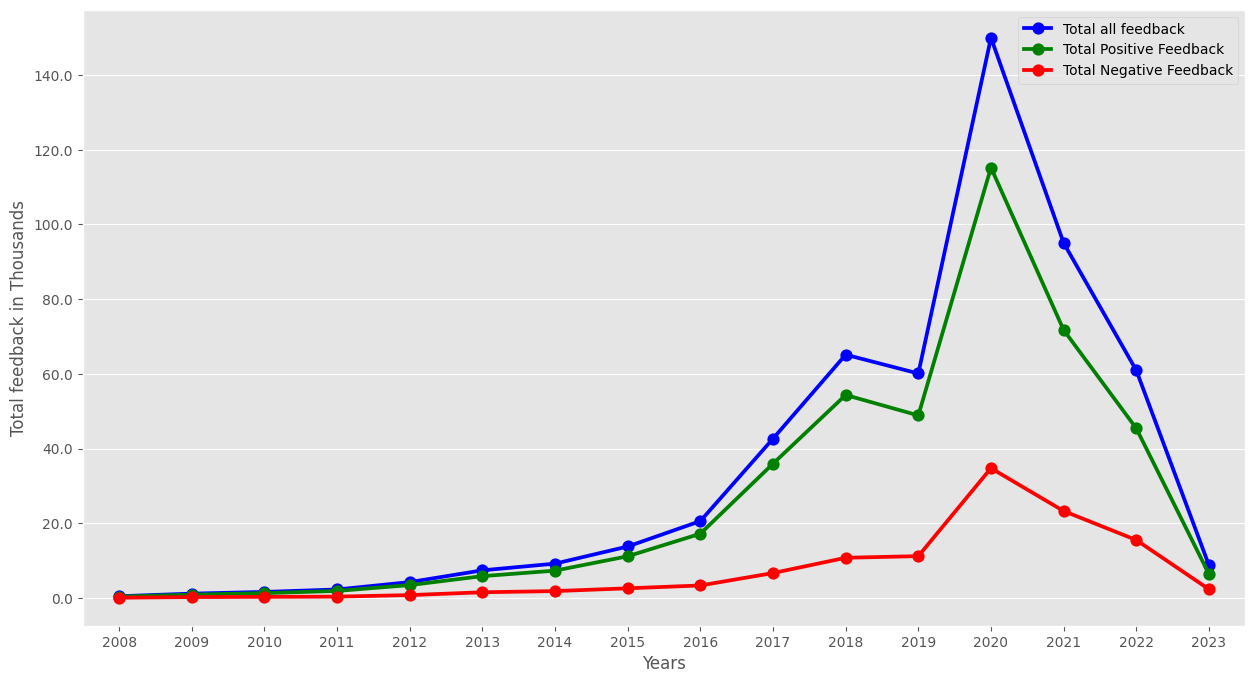

In [39]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize= (15,8))
total_feedback = df_combined.groupby('year').sum(numeric_only=True)['total_feedback_count'].reset_index()

sns.pointplot(total_feedback,x='year',y='total_feedback_count', color="blue", label="Total all feedback",ax=ax1)

total_pos_feedback = df_combined.groupby('year').sum(numeric_only=True)['total_pos_feedback_count'].reset_index()
sns.pointplot(total_pos_feedback,x='year',y='total_pos_feedback_count', color="green", label="Total Positive Feedback",ax=ax1)

total_neg_feedback = df_combined.groupby('year').sum(numeric_only=True)['total_neg_feedback_count'].reset_index()
sns.pointplot(total_neg_feedback,x='year',y='total_neg_feedback_count', color="red", label="Total Negative Feedback",ax=ax1)

ax1.yaxis.set_major_formatter(hundformatter)
ax1.set_ylabel("Total feedback in Thousands")
ax1.set_xlabel("Years")
ax1.legend()

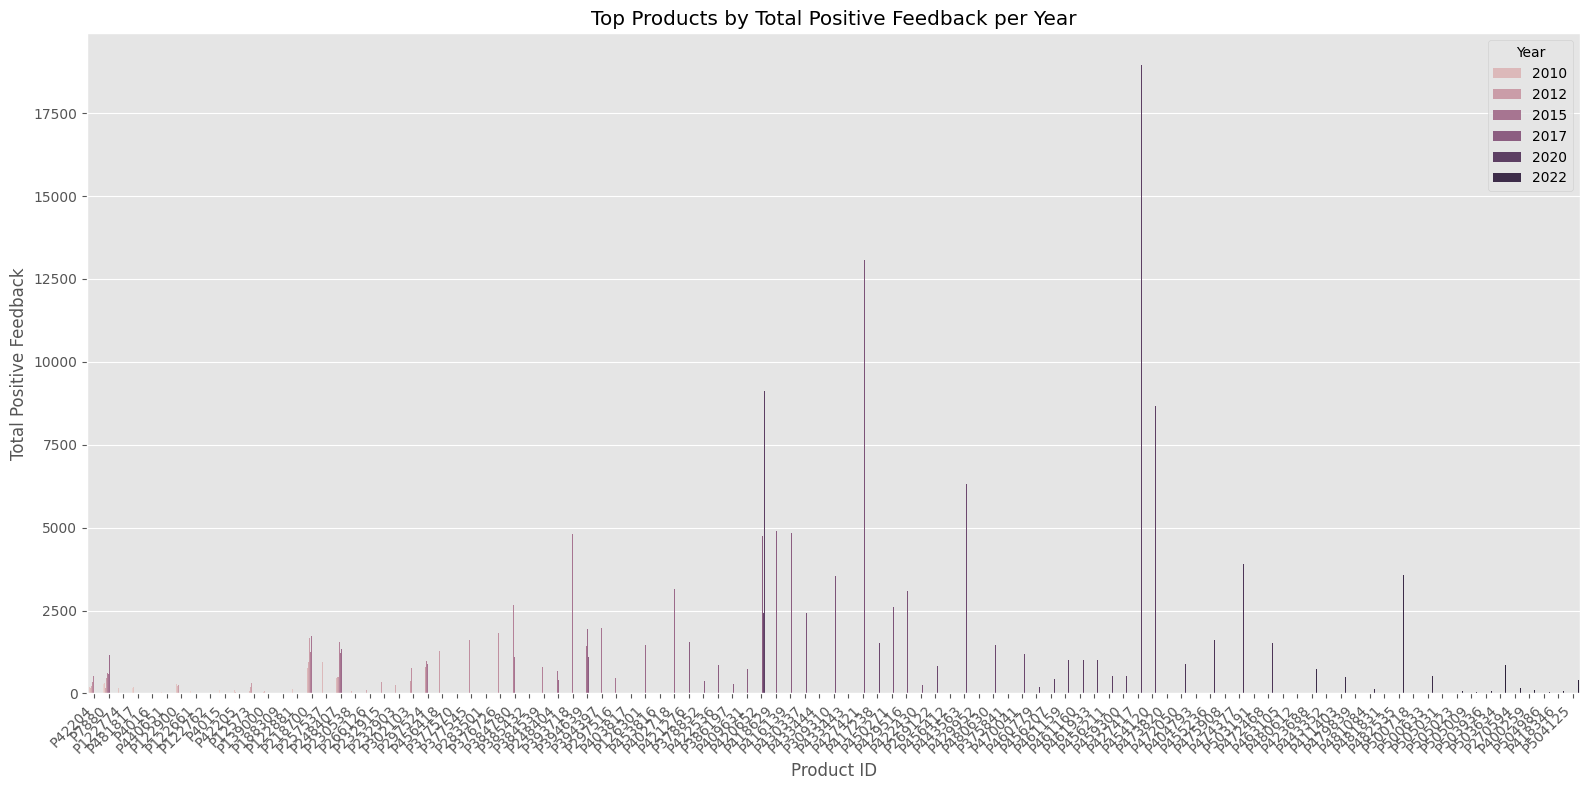

In [36]:
    # Group by year and product_id
    feedback_summary = (
        df_combined.groupby(['year', 'product_id'])
        .agg(
            total_reviews=('review_text', 'count'),
            total_positive=('total_pos_feedback_count', 'sum'),
            total_negative=('total_neg_feedback_count', 'sum'),
            avg_rating=('rating', 'mean')
        )
        .reset_index()
        .sort_values(by=['year', 'total_reviews'], ascending=[False, False])
    )

    # Pick top 10 products per year based on number of reviews
    top_feedback_per_year = (
        feedback_summary.groupby('year')
        .head(10)
        .sort_values(['year', 'total_reviews'], ascending=[True, False])
    )

    # Create barplot
    plt.figure(figsize=(16, 8))
    sns.barplot(
        data=top_feedback_per_year,
        x='product_id', y='total_positive', hue='year'
    )
    plt.title("Top Products by Total Positive Feedback per Year")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Product ID")
    plt.ylabel("Total Positive Feedback")
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()